# **Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

## Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

### Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 3s 0us/step


Let's take a look at a sample of the images in the dataset:

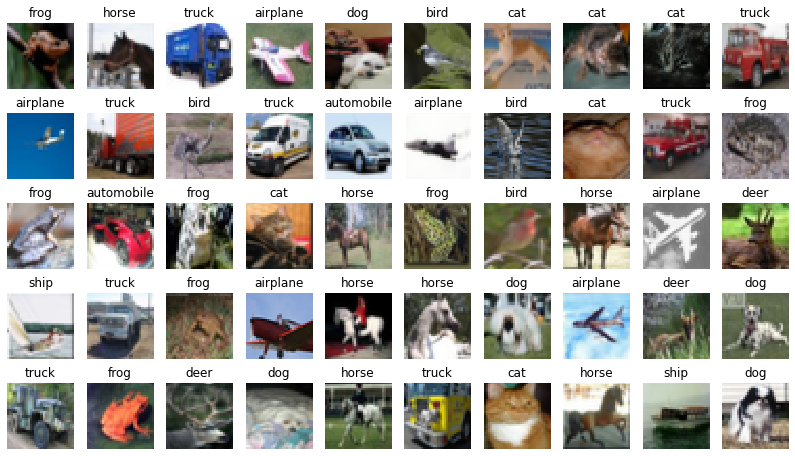

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std #[TO COMPLETE]
X_valid = (X_valid - mean) / std #[TO COMPLETE]
X_test = (X_test - mean) / std #[TO COMPLETE]


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

### Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 12s 5ms/step - loss: 1.4371 - accuracy: 0.4949 - val_loss: 1.2005 - val_accuracy: 0.5842
Epoch 2/10
352/352 [==============================] - 2s 4ms/step - loss: 1.1345 - accuracy: 0.6075 - val_loss: 1.1145 - val_accuracy: 0.6102
Epoch 3/10
352/352 [==============================] - 2s 4ms/step - loss: 1.0192 - accuracy: 0.6493 - val_loss: 1.0801 - val_accuracy: 0.6280
Epoch 4/10
352/352 [==============================] - 2s 4ms/step - loss: 0.9453 - accuracy: 0.6782 - val_loss: 1.0297 - val_accuracy: 0.6432
Epoch 5/10
352/352 [==============================] - 2s 4ms/step - loss: 0.9010 - accuracy: 0.6893 - val_loss: 1.0032 - val_accuracy: 0.6600
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 0.8603 - accuracy: 0.7036 - val_loss: 1.0546 - val_accuracy: 0.6414
Epoch 7/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8279 - accuracy: 0.7156 - val_loss: 1.0152 - val_accuracy: 0.6582
Epoch

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0582 - accuracy: 0.6499 - 658ms/epoch - 2ms/step
accuracy: 64.99%


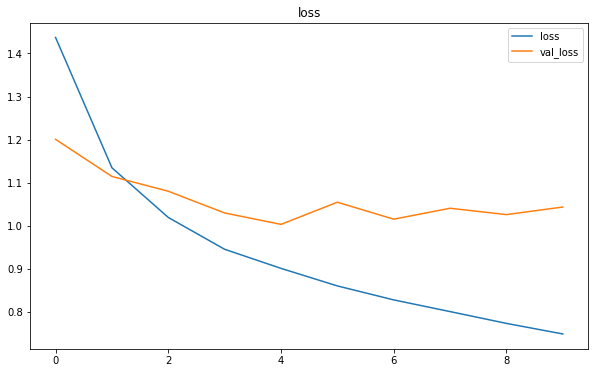

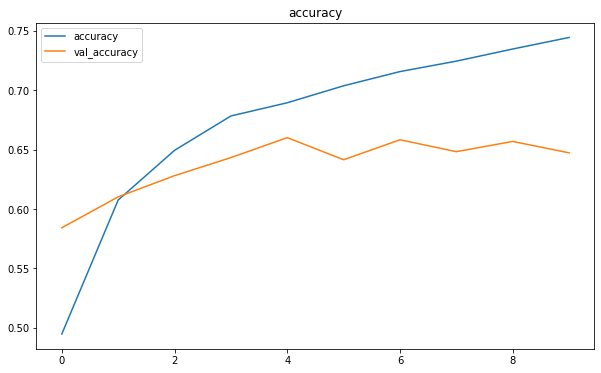

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



### Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

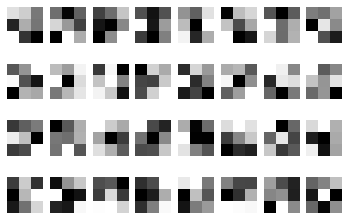

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   The number of parameters on each convolutional layer depend on the kernel size and the amount of filters in input and output. A simple formula to calculate the number of parameters could be the following: 

  $$ parameters = output\_channels \cdot (input\_channels \cdot kernel\_weight \cdot kernel\_height + 1) $$
  
  where the $+1$ is the bias.

* In the first layer we have a kernel of $3 \times 3$, so the number of parameters is equal to $32 \cdot (3 \cdot 3 \cdot 3 + 1) = 896$
* In the second the kernel has size $2 \times 2$ thus the total number of parameters is $16 \cdot (32 \cdot 2 \cdot 2 + 1) = 2064$

2.   The two convolutional layers do not have the same number of parameters because the kernels used have distinct sizes and the input/output channels are different. Indeed:

* In the first layer, the kernel is $3 \times 3$, the input image has 3 channels and in output there are 32 channels.
* The second layer has a kernel size of $2 \times 2$, 32 channels in input and 16 in output.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 3s 6ms/step - loss: 1.6458 - accuracy: 0.4137 - val_loss: 1.3794 - val_accuracy: 0.5146
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.3115 - accuracy: 0.5374 - val_loss: 1.2414 - val_accuracy: 0.5654
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2008 - accuracy: 0.5792 - val_loss: 1.1783 - val_accuracy: 0.5924
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1301 - accuracy: 0.6060 - val_loss: 1.1111 - val_accuracy: 0.6128
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0807 - accuracy: 0.6231 - val_loss: 1.0828 - val_accuracy: 0.6240
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0383 - accuracy: 0.6414 - val_loss: 1.0524 - val_accuracy: 0.6390
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0012 - accuracy: 0.6543 - val_loss: 1.0357 - val_accuracy: 0.6366
Epoch 

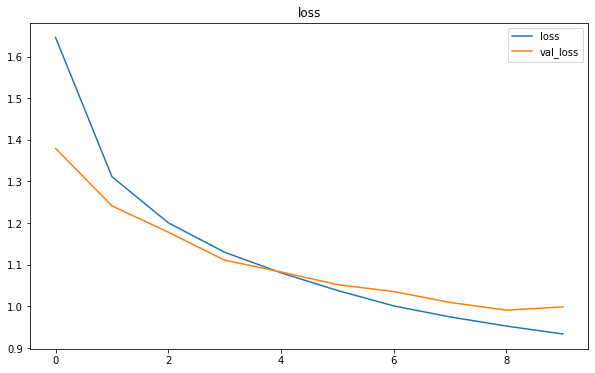

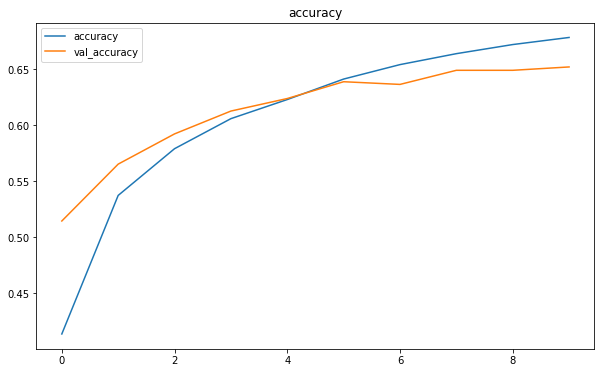

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 30, 30, 96)        2688      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 15, 15, 96)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 15, 15, 96)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 14, 14, 48)        18480     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 7, 7, 48)        

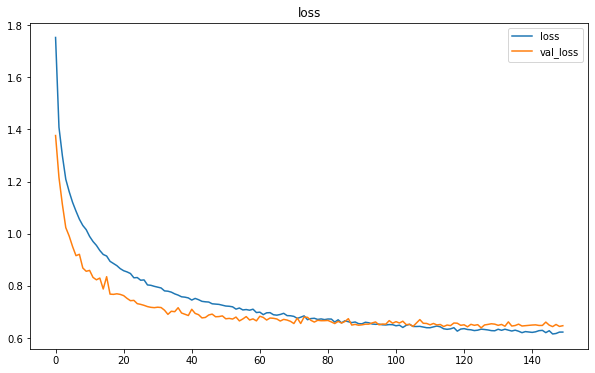

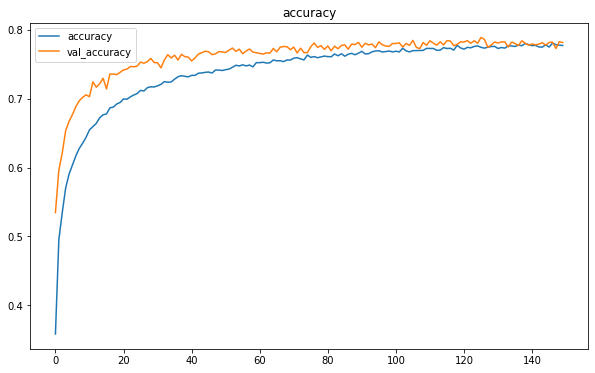

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Conv2D(filters=48, kernel_size=(2, 2), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

history = model.fit(X_train, y_train, epochs=150, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found has the following configuration:

* Conv2D layer with: 96 filters, $3 \times 3$ filter, activation *ReLu*
* MaxPool2D layer with: pool_size of $2 \times 2$
* Dropout layer with: rate 0.4
* Conv2D layer with: 48 filters, $2 \times 2$ filter, activation *ReLu*
* MaxPool2D layer with: pool_size of $2 \times 2$
* Dropout layer with: rate 0.4
* Flatten
* Dense layer with: 100 neurons, activation *ReLu*
* Dropout layer with: rate 0.4
* Dense layer with: 10 neurons, activation *Softmax*
* Optimizer: *adam*
* Epochs: 150
* Batch size: 128

The achieved accuracy in the test set is about 77.32% with a loss of 0.6633.

Discussion:

After have tested lots of different models, changing each parameters, it seems that a higher number of **filters** in the convolutional layers and adding a **Dense** layer before the last one increase the accuracy of the model. In order to prevent overfitting, a **Dropout** layer with $rate = 0.4$ is added at the end of each MaxPool2D and between the two Dense layers. Running the model for 150 epochs allow to obtain the accuracy above.

Besides, I tested also other models:
* Model 1 (**sgd** instead of adam):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *sgd*
  * Epochs: 10
  * Batch size: 128
  
  Accuracy: 56.55%

  Loss: 1.2331

* Model 2 (**tanh** in convolutional layers):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *tanh*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *tanh*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 128

  Accuracy: 65.53%

  Loss: 0.9712

* Model 3 (bigger **pool_size**):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $3 \times 3$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $3 \times 3$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 128

  Accuracy: 62.18%

  Loss: 1.0906

* Model 4 (more **epochs**):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 20
  * Batch size: 128
  
  Accuracy: 66.66%

  Loss: 0.9620

* Model 5 (more **filters**):
  * Conv2D layer with: 64 filters, $3 \times 3$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 64 filters, $2 \times 2$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 128
  
  Accuracy: 71.25%

  Loss: 0.8510

* Model 6 (**kernel size** in conv2D):
  * Conv2D layer with: 32 filters, $5 \times 5$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $5 \times 5$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 128
  
  Accuracy: 66.05%

  Loss: 0.9847

* Model 7 (add a **Dense** layer):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 100 neurons, activation *ReLu*
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 128
  
  Accuracy: 68.60%

  Loss: 0.9335

* Model 8 (smaller **batch** size):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 32
  
  Accuracy: 67.62%

  Loss: 0.9428

* Model 9 (only **one maxPool** layer):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *ReLu*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *ReLu*
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 128
  
  Accuracy: 66.48%

  Loss: 0.9821

* Model 10 (**padding** on conv2D layers):
  * Conv2D layer with: 32 filters, $3 \times 3$ filter, activation *ReLu*, padding *same*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Conv2D layer with: 16 filters, $2 \times 2$ filter, activation *ReLu*, padding *same*
  * MaxPool2D layer with: pool_size of $2 \times 2$
  * Flatten
  * Dense layer with: 10 neurons, activation *Softmax*
  * Optimizer: *adam*
  * Epochs: 10
  * Batch size: 128
  
  Accuracy: 67.18%

  Loss: 0..9457

**Discussion**:
* Model 1: using *sgd* instead of *adam* in this model seems to lead to worse results, thus *adam* is more suitable for this project.

* Model 2: *tanh* in the convolutional layers produce a slighlty better result in term of accuracy.

* Model 3: increasing the size in MaxPool layers does not improve the results, probably because it loses too much information from the images.

* Model 4: running the model for a greater number of epochs leads to a better accuracy, however a much larger number could bring to overfitting if not regularized.

* Model 5: with a larger number of filters in both the convolutional layers the model improves the results and the accuracy is really better than before since it produces more information about the input images.

* Model 6: changing the size of the kernels in the Conv2D layers doesn't seem to improve the learning in this case.

* Model 7: adding a Dense layers with more neurons than the last one leads to a better accuracy, however increasing the number of epochs produce overfitting if the network has not regularization.

* Model 8: a smaller batch size improve the accuracy since the model learn from more examples in each epoch.

* Model 9: deleting one of the two MaxPool layers does not have greater results, however removing the second has slighlty better result than removing the first one.

* Model 10: using padding on the convolutional layers produces better results on this network.